In [1]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from palettable.cmocean.diverging import Delta_10 as colors
%matplotlib inline  

In [2]:
states = geopandas.read_file("./us_states.geojson")
states["FIPS"] = states["FIPS"].astype(np.float32)
states = states.set_index("FIPS")

In [3]:
data = pd.read_csv("./CCES2018_OUTPUT.tab", sep = "\t")


data = data[data["inputstate"].isin(states.index)]

abortion_data = data[["inputstate","CC18_321a","CC18_321b","CC18_321c","CC18_321f"]]
replace_dict = {1:100, 2:0}
abortion_data.iloc[:,1:] = abortion_data.iloc[:,1:].replace(replace_dict)

/home/michal/miniconda3/envs/data-analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (288,289,296,303,344,350,357,361,374,423,437,455,456,473,474,481,488,497,500) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/michal/miniconda3/envs/data-analysis/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/michal/miniconda3/envs/data-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [4]:
abortion_data_grouped = abortion_data.groupby("inputstate")

stats = abortion_data_grouped.mean()

complete_data = states.join(stats)

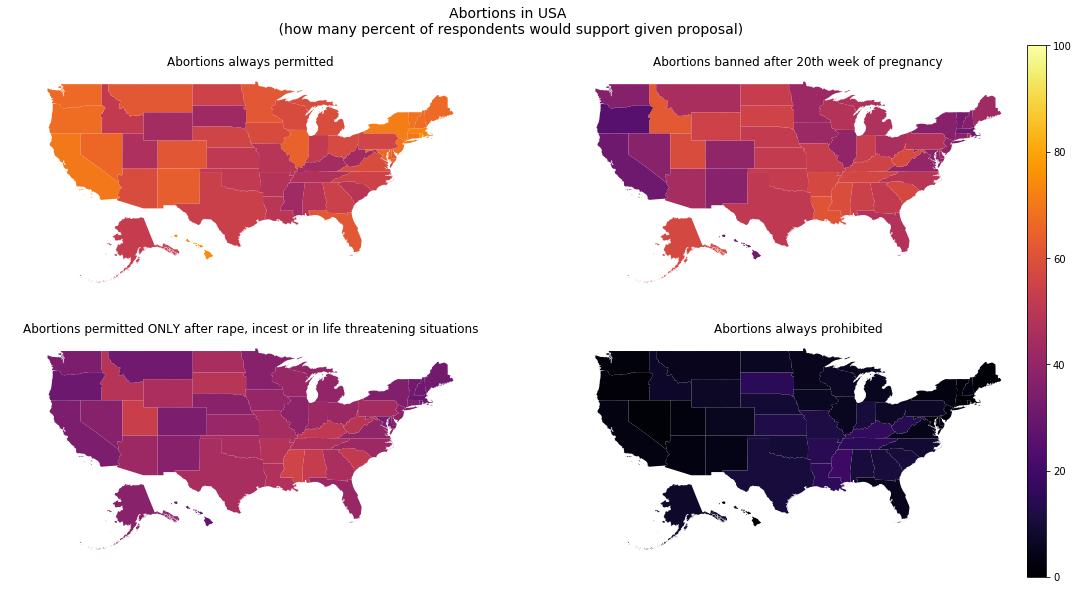

In [5]:
fig , axes  = plt.subplots(2,2, True, True,figsize=(18,9))
colormap = 'inferno'
plt.suptitle("Abortions in USA\n (how many percent of respondents would support given proposal)", fontsize=14)
cbar_ax = fig.add_axes([.9, .1, .015, .82])
axes[0,0].title.set_text("Abortions always permitted")
complete_data.plot("CC18_321a",ax=axes[0,0], cmap = colormap,  vmin = 0, vmax= 100, cax = cbar_ax, legend = True)
complete_data.plot("CC18_321b",ax=axes[1,0], cmap = colormap, vmin = 0, vmax= 100)
axes[1,0].title.set_text("Abortions permitted ONLY after rape, incest or in life threatening situations")
complete_data.plot("CC18_321c",ax=axes[0,1], cmap = colormap,  vmax= 100)
axes[0,1].title.set_text("Abortions banned after 20th week of pregnancy")

complete_data.plot("CC18_321f",ax=axes[1,1], cmap = colormap, vmax= 100)
axes[1,1].title.set_text("Abortions always prohibited")

for ax in axes.flatten():
    ax.set_axis_off()
fig.savefig("map.svg")
fig.savefig("map.png")